In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint
from config import api_key

In [212]:
us_file = pd.read_csv("../Video_CSVs/USvideos.csv")
us_file.head()
gb_df = pd.read_csv("../Video_CSVs/GBvideos.csv")
gb_df.head()
CA_df = pd.read_csv("../Video_CSVs/CAvideos.csv")
CA_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


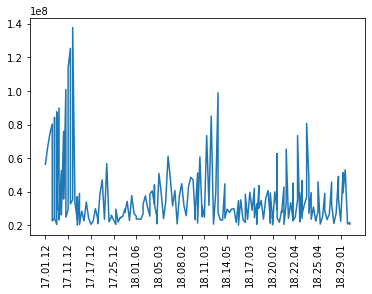

In [271]:
top_200=CA_df.nlargest(200, ['views'])
top_200.reset_index(drop=True,inplace=True)
top_200.sort_values(by='trending_date',inplace=True)
plt.plot(top_200["trending_date"],top_200["views"])
x_axis=[]
x_axis_labels=[]
for i in range(len(top_200["trending_date"].unique())):
    if i %10==0:
        x_axis_labels.append(top_200["trending_date"].unique()[i])
        x_axis.append(i)
    
plt.xticks(x_axis,x_axis_labels,rotation="vertical")
plt.show()

In [272]:
# get api data to add category names
params = {"part":"snippet","regionCode":"US",
           "key":api_key}
base_url= "https://www.googleapis.com/youtube/v3/videoCategories"
response = requests.get(base_url, params=params).json()
response
id_list = []
title_list = []
for i in response['items']:
    #print(i)
    id_list.append(i['id'])
    title_list.append(i['snippet']['title'])
new_df=pd.DataFrame({"category_id":id_list,"title_list":title_list})
new_df["category_id"]=new_df["category_id"].astype("int64")
new_df.dtypes
# Merge with us_df
CA_df=pd.merge(CA_df,new_df,on='category_id',how="left")
CA_df.drop(columns=["publish_time","tags","thumbnail_link","comments_disabled","ratings_disabled","video_error_or_removed","description"],inplace=True)
CA_df
# Merge with gb_df
gb_df=pd.merge(gb_df,new_df,on='category_id',how="left")
gb_df.drop(columns=["publish_time","tags","thumbnail_link","comments_disabled","ratings_disabled",
                    "video_error_or_removed","description",'category_id'],inplace=True)
gb_df

# Merge with us_df
us_df=pd.merge(us_file,new_df,on='category_id',how="left")
us_df


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_list
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


In [161]:
# see if there is any missing data
us_file.count()
CA_df.count()
gb_df.count()

video_id         38916
trending_date    38916
title            38916
channel_title    38916
views            38916
likes            38916
dislikes         38916
comment_count    38916
title_list       38916
dtype: int64

In [162]:
# focus on data that we are interested in
us_df=us_df.loc[:,("trending_date", "title", "channel_title", "title_list", "views", "likes", "dislikes")]
us_df
# rename columns
us_df=us_df.rename(columns={"video_id":"Video ID", 
                            "trending_date": "Trending Date",
                            'title': "Title",
                            "channel_title":"Channel Title",
                            'title_list': "Category ID",
                            'views':'Views', 
                            "likes": 'Likes', 
                            'dislikes': "Dislikes",
                            'comment_count': 'Comment Count'})

Summary_gb=gb_df.rename(columns={"video_id":"Video ID", "trending_date": "Trending Date",'title': "Title", 
                        "channel_title":"Channel Title", 
                       'title_list': "Category ID", 'views':'Views', "likes": 'Likes', 'dislikes': "Dislikes",
                        'comment_count': 'Comment Count'})
#Renaming the Columns
CA_df_RN=CA_df.rename(columns={"video_id":"Video ID", "trending_date": "Trending Date",'title': "Title",
                        "channel_title":"Channel Title",
                       'category_id': "Category ID", 'views':'Views', "likes": 'Likes', 'dislikes': "Dislikes",
                        'comment_count': 'Comment Count'})

In [163]:
#sorted views in descending order (largest values at the top)
top_views_us=us_df.sort_values("Views",ascending=False)
#top 5 video views
top_5_views_us = top_views_us[:5]
top_5_views_us

#sorted in descending order (largest values at the top)
CA_top_5_views=CA_df_RN.sort_values("Views",ascending=False)
#top 5 video views (saving as new variable)
CA_top_views_df = CA_top_5_views.head(5)
CA_top_views_df

#this is for myles
Views_CategoryID=Summary_gb.groupby('Category ID').sum()["Views"]
Views_CategoryID_df=pd.DataFrame(Views_CategoryID)
Views_CategoryID_df

Top_5_CategoryID_Views=Views_CategoryID_df.sort_values("Views", ascending=False)
Top5Viewed=Top_5_CategoryID_Views.head(5)
Top5Viewed

Bottom_5_CategoryID_Views=Views_CategoryID_df.sort_values("Views", ascending=True)
Bottom5Viewed=Bottom_5_CategoryID_Views.head(5)
Bottom5Viewed

Top=Top5Viewed.plot.bar()
Bottom5Viewed.plot.bar()

,Video ID,Trending Date,Title,Channel Title,Category ID,Views,Likes,Dislikes,Comment Count,title_list
5900,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,137843120,3014479,1602383,817582,Entertainment
5623,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,125431369,2912715,1545018,807558,Entertainment
5398,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,113876217,2811217,1470387,787174,Entertainment
5197,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,100911567,2656678,1353655,682890,Entertainment
34361,VYOjWnS4cMY,18.13.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,98938809,3037318,161813,319502,Music


In [164]:
#same but for gb 
#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count')
All_CategoryID=Summary_gb.groupby('Category ID').sum()[["Views", 'Likes','Dislikes']]
All_CategoryID_df=pd.DataFrame(All_CategoryID)
All_CategoryID_df


#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count') US
All_CategoryID_US=us_df.groupby('Category ID').sum()[["Views", 'Likes','Dislikes']]
All_CategoryID_US_df=pd.DataFrame(All_CategoryID_US)
All_CategoryID_US_df

########## add canda
#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count') US
All_CategoryID_US=us_df.groupby('Category ID').sum()[["Views", 'Likes','Dislikes']]
All_CategoryID_US_df=pd.DataFrame(All_CategoryID_US)
All_CategoryID_US_df

,Views
Category ID,
Autos & Vehicles,214184514
Comedy,3962062143
Education,444290557
Entertainment,29786283041
Film & Animation,8362707626
Gaming,1746619532
Howto & Style,1190155227
Music,171160864769
News & Politics,1409131375


In [ ]:
# Find the total Sum of the Views, Likes, Dislikes, Comment Count 
Sum_All_CategoryID_df=All_CategoryID_df
Sum_All_CategoryID_df['Total Count']=All_CategoryID_df.sum(axis=1)
Sum_All_CategoryID_df


Likes_Category_US=us_df.groupby('Category ID').sum()["Likes"]
Likes_Category_US_df=pd.DataFrame(Likes_Category_US)
Likes_Category_US_df=Likes_Category_US_df.reset_index()
Likes_Category_US_df = Likes_Category_US_df.sort_values("Likes", ascending=False)
Likes_Category_US_df
#Finding the Sum of Dislikes 
Dislikes_Category_US=us_df.groupby('Category ID').sum()["Dislikes"]
Dislikes_Category_US_df=pd.DataFrame(Dislikes_Category_US)
Dislikes_Category_US_df=Dislikes_Category_US_df.reset_index()
Dislikes_Category_US_df=Dislikes_Category_US_df.sort_values("Dislikes",ascending=False)
Dislikes_Category_US_df

#Finding the Sum of Views 
Views_Category_US=us_df.groupby('Category ID').sum()["Views"]
Views_Category_US_df=pd.DataFrame(Views_Category_US)
Views_Category_US_df=Views_Category_US_df.reset_index()
Views_Category_US_df=Views_Category_US_df.sort_values("Views", ascending=False)
Views_Category_US_df


#### add canada

In [ ]:
Top_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=False)
Top5Viewed_US=Top_5_CategoryID_Views_US.head(5)
Top5Viewed_US


# create pie plot for the top viewed categories in YouTube
# Tells matplotlib to seperate the "Music" (#1 category) section from the others
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(Top5Viewed_US["Views"], explode=explode, labels=Top5Viewed_US["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories")



Bottom_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=True)
Bottom5Viewed_US=Bottom_5_CategoryID_Views_US.head(5)
Bottom5Viewed_US

# create pie plot for the least viewed categories in YouTube
# Tells matplotlib to seperate the "Shows" (least viewed) section from the others
explode = (0.5, 0, 0, 0, 0)
colors = ["crimson", "tomato", "darkorange", "sandybrown", "peachpuff"]
plt.pie(Bottom5Viewed_US["Views"], explode=explode, labels=Bottom5Viewed_US["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories")
######################################
#do same for gb and canada






In [ ]:
Total_US=All_CategoryID_US_df.sum()
Total_US